In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.shape

(2200, 8)

In [5]:
print("Total Number Of Crops :",len(df["label"].unique()))
print("List of Crops :",df["label"].unique())

Total Number Of Crops : 22
List of Crops : ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


<AxesSubplot:>

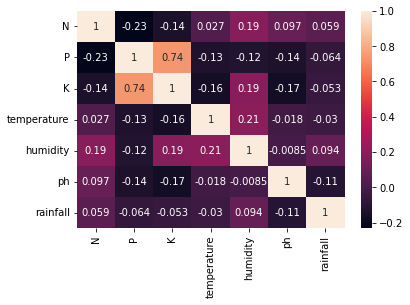

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set(style="ticks")
# pairplot=sns.pairplot(df, hue="label", palette="Set2")
# plt.show()

In [8]:
import plotly.express as px
stats = df.describe().transpose()
# Plotting mean values
fig = px.bar(stats, x=stats.index, y='mean', title='Mean Values', labels={'mean': 'Mean'})
fig.show()
# Plotting standard deviation values
fig = px.bar(stats, x=stats.index, y='std', title='Standard Deviation Values', labels={'std': 'Standard Deviation'})
fig.show()

In [9]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


# Plotting Comparison Between Crops Based On N,P,K values

In [34]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [11]:
def check_dup(df):
    count_dup = df.duplicated().sum()
    print("Duplicates :",count_dup)
    if count_dup>=1:
        df.drop_duplicates(inplace=True)
        print("Found And Removed")
    else:
        print("Not Found")
print(check_dup(df))

Duplicates : 0
Not Found
None


In [12]:
X = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']   

In [13]:
from sklearn.model_selection import train_test_split 
X_train ,X_test , y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=32)

In [14]:
print("x_train :",X_train.shape)
print("x_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650,)
y_test : (550,)


# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
KNN_PREDICT = knn.predict(X_test)
#predicted_values = knn.predict([[99,15,27,27.417112,56.636362,6.086922,127.924610]])
#predicted_values

98.18181818181819


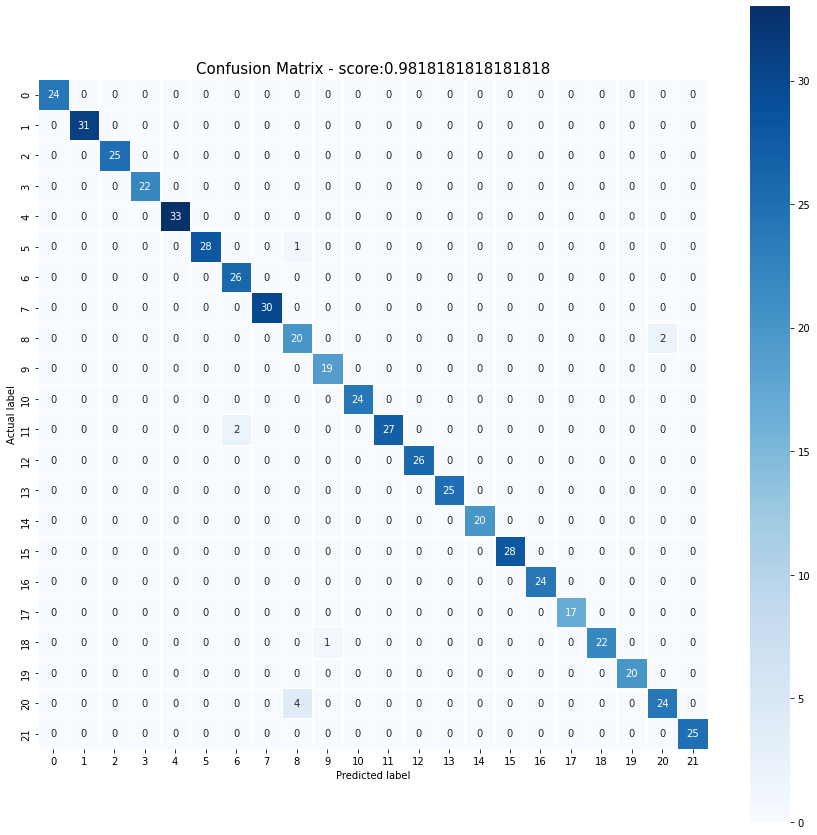

In [16]:
from sklearn.metrics import accuracy_score , confusion_matrix
acc1 = accuracy_score(y_test,KNN_PREDICT)
print(acc1 * 100)
cnf_mat1 = confusion_matrix(y_test,KNN_PREDICT)
cnf_mat1 = confusion_matrix(y_test,KNN_PREDICT)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,KNN_PREDICT))
plt.title(all_sample_title, size = 15);
plt.show()
# print(cnf_mat1)

# DECISION TREE

In [17]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
DEC_TREE_PREDICT = dec_tree.predict(X_test)

98.18181818181819


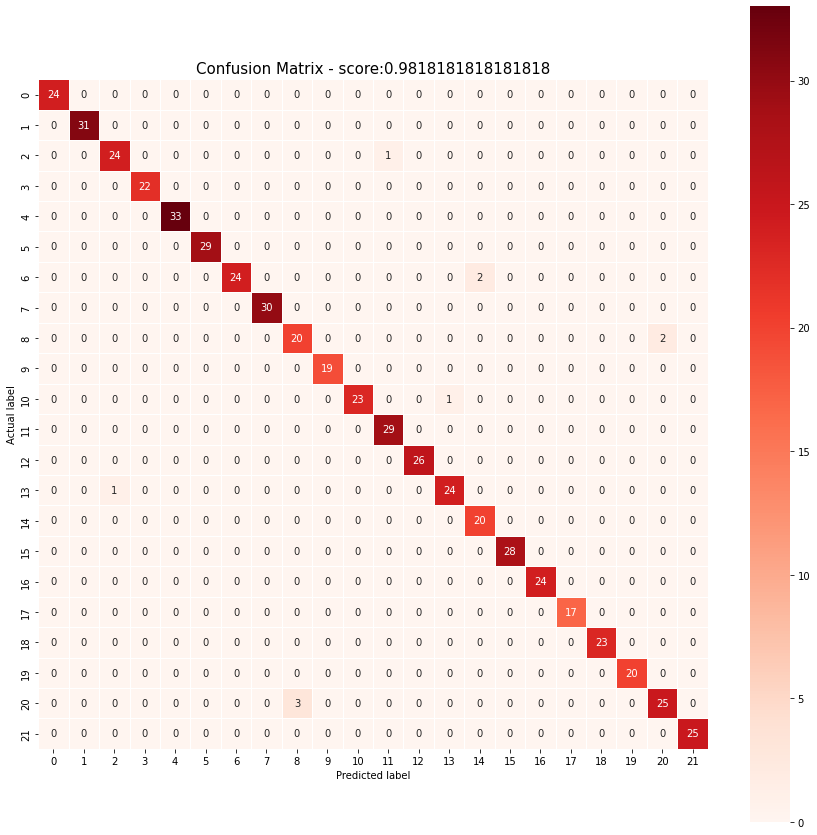

In [18]:
acc2 = accuracy_score(y_test,DEC_TREE_PREDICT)
print(acc2 * 100)
cnf_mat2 = confusion_matrix(y_test,DEC_TREE_PREDICT)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat2, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,DEC_TREE_PREDICT))
plt.title(all_sample_title, size = 15);
plt.show()
# print(cnf_mat2)

# RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(n_estimators=10,random_state=0)
rand_for.fit(X_train,y_train)
RANDOM_PREDICT = rand_for.predict(X_test)
#predicted_values2 = rand_for.predict([[11,15,37,37.4, 56.636362,6.06922,143.924610]])
#predicted_values2

98.9090909090909


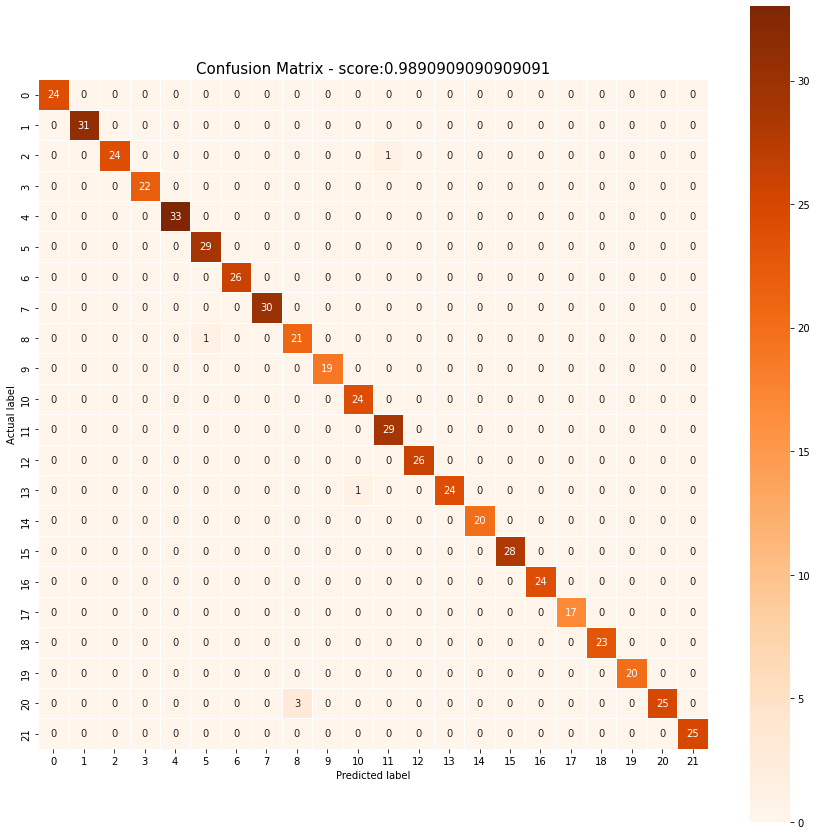

In [20]:
acc3 = accuracy_score(y_test,RANDOM_PREDICT)
print(acc3 * 100)
cnf_mat3 = confusion_matrix(y_test,RANDOM_PREDICT)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat3, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,RANDOM_PREDICT))
plt.title(all_sample_title, size = 15);
plt.show()

# Gaussian NB


In [21]:
from sklearn.naive_bayes import GaussianNB
nb_class = GaussianNB()
nb_class.fit(X_train,y_train)
NB_PREDICT  = nb_class.predict(X_test)
#NB_PREDICT  = nb_class.predict([[76,48,18,19.29563411,69.63481219,5.77597783,83.21030571]])
#NB_PREDICT

99.27272727272727


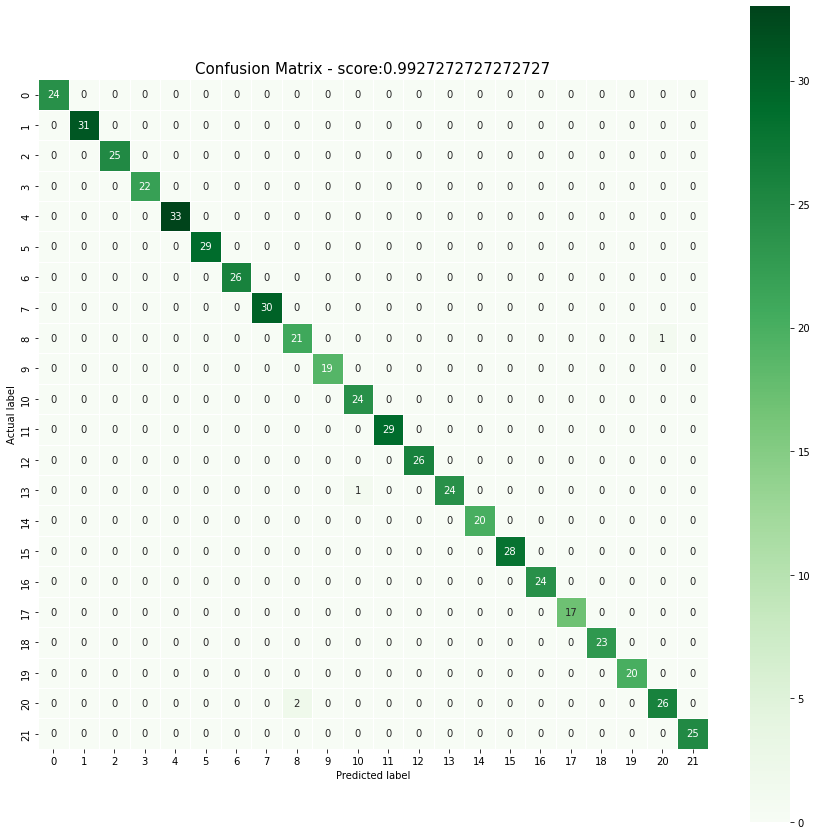

In [22]:
acc4 = accuracy_score(y_test,NB_PREDICT)
print(acc4 * 100)
cnf_mat4 = confusion_matrix(y_test,NB_PREDICT)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat4, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,NB_PREDICT))
plt.title(all_sample_title, size = 15);
plt.show()

# GRADIENT BOOSTING

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gd_class = GradientBoostingClassifier()
gd_class.fit(X_train,y_train)
GD_PREDICT = gd_class.predict(X_test)

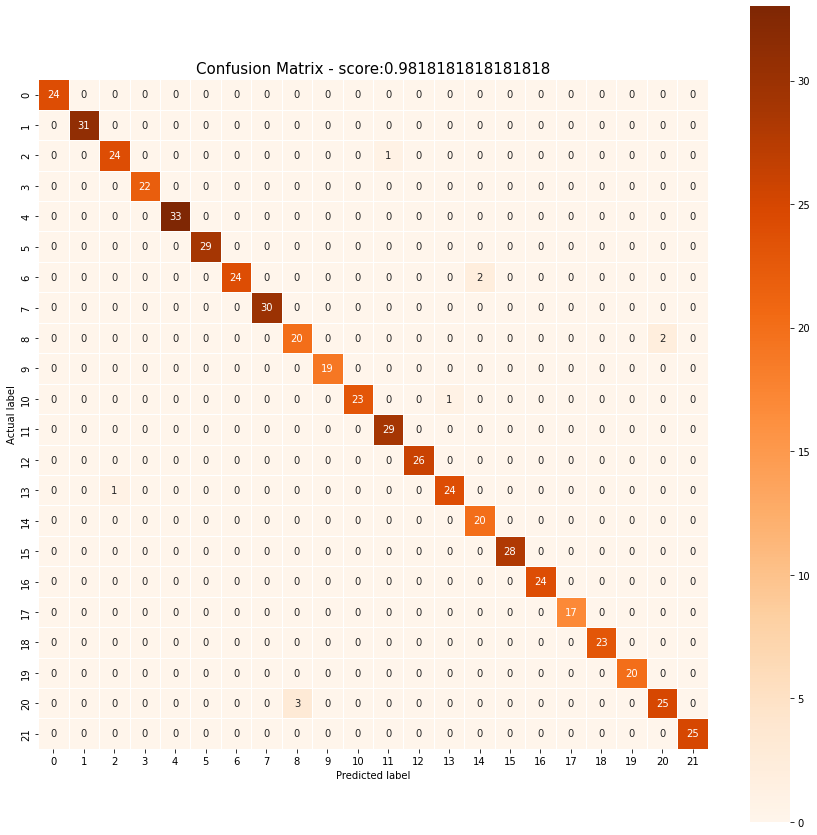

In [24]:
acc5 = accuracy_score(y_test,GD_PREDICT)
acc5
cnf_mat5 = confusion_matrix(y_test,DEC_TREE_PREDICT)
plt.figure(figsize=(15,15))
sns.heatmap(cnf_mat5, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Oranges');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,DEC_TREE_PREDICT))
plt.title(all_sample_title, size = 15);
plt.show()

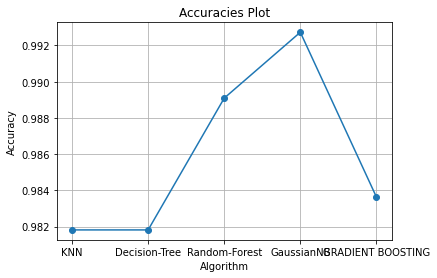

In [25]:
accuracies = [acc1,acc2,acc3,acc4,acc5]
plt.plot(accuracies, marker='o', linestyle='-')
plt.title('Accuracies Plot')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracies)), ['KNN', 'Decision-Tree', 'Random-Forest','GaussianNB','GRADIENT BOOSTING'])
plt.grid(True)
plt.show()

In [26]:
import plotly.graph_objects as go
# Assuming you have a list of accuracies
accuracies = [acc1, acc2, acc3,acc4,acc5]
algorithms = ['KNN', 'Decision-Tree', 'Random-Forest','GaussianNB','GRADIENT-BOOSTING']
# Creating the plot
fig = go.Figure(data=go.Scatter(x=algorithms, y=accuracies, mode='markers+lines', marker=dict(symbol='circle', size=10), line=dict(width=2)))
# Adding titles and labels
fig.update_layout(title='Accuracies Plot', xaxis_title='Algorithm', yaxis_title='Accuracy')
# Displaying the plot
fig.show()

In [27]:
import pickle

# Save the model to disk
with open('crop_recommendation_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [28]:
with open('crop_recommendation_model2.pkl', 'wb') as file:
    pickle.dump(rand_for, file)

In [29]:
with open('crop_recommendation_model3.pkl', 'wb') as file:
    pickle.dump(gd_class, file)